In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X = bc['data']
y = bc['target']
X_names = bc['feature_names']

df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
df.columns = list(X_names) + ['target']

pd.set_option('display.max_columns', 50)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Q1) Use scatter plots to look at the data (use different colors for the classes)

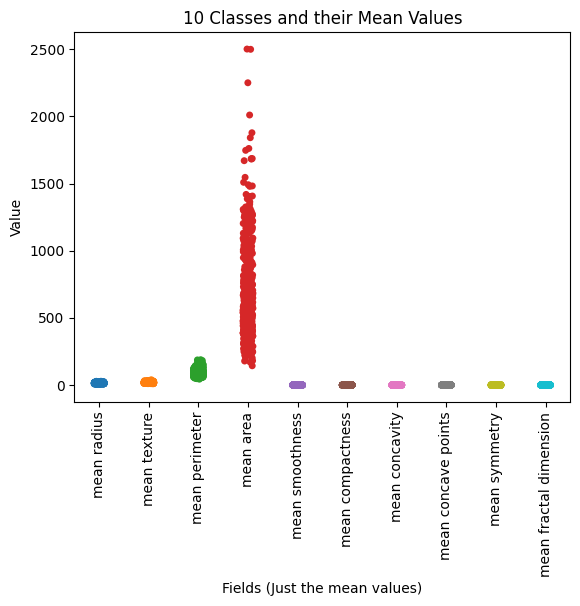

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel('Fields (Just the mean values)')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.title("10 Classes and their Mean Values")
sns.stripplot(data=df.iloc[:, :10])
plt.show()

### Q3) Use box plots to look at the data

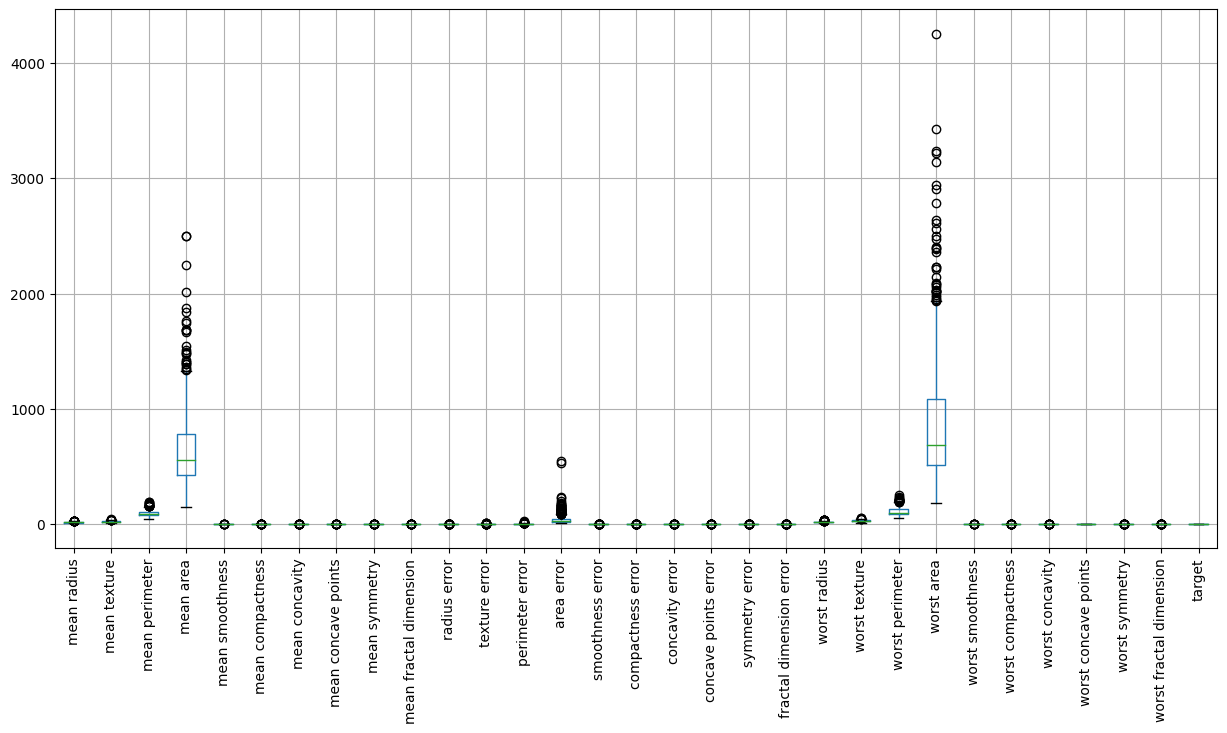

In [3]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

### Q4) Create a training and test set with random_state = 3

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

### Q5) Train a decision tree model on the training set.

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print("Training accuracy", train_acc)
print("Testing accuracy", test_acc)

Training accuracy 1.0
Testing accuracy 0.9230769230769231


### Q6) Train a Logistic regression model on the training set

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([
    ('scaling', StandardScaler()),
    ('model', LogisticRegression())
        ]
    )
logreg.fit(X_train, y_train)


Pipeline(steps=[('scaling', StandardScaler()), ('model', LogisticRegression())])

In [8]:
train_acc = logreg.score(X_train, y_train)
test_acc = logreg.score(X_test, y_test)
print("Training accuracy", train_acc)
print("Testing accuracy", test_acc)

Training accuracy 0.9882629107981221
Testing accuracy 0.972027972027972


### Q7) Train a random forest model on the training set

In [9]:
from sklearn.ensemble import RandomForestClassifier

    
rf = Pipeline([
    ('scaling', StandardScaler()),
    ('rf_model', RandomForestClassifier())
        ]
    )

rf.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('rf_model', RandomForestClassifier())])

In [10]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print("Training accuracy", train_acc)
print("Testing accuracy", test_acc)

Training accuracy 1.0
Testing accuracy 0.9440559440559441


### Q8) Which model performed better?

#### From the results above, it is evident that Logistic regression was the best performer. It gave the highest accuracy, and also did not overtrain to give a 100% accuracy on training data

### Q9) Applying Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")


param_grid = [
  {'model__class_weight': [None, 'balanced'], 'model__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000],
  'model__penalty': ['l1', 'l2']}
 ]

gcv = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', refit=True)
gcv = gcv.fit(X_train, y_train)

gcv.best_params_

{'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l2'}

In [12]:
gcv.score(X_test, y_test)

0.972027972027972

In [13]:
gcv.best_score_

0.9788508891928865

#### We can observe a 6% increase in score